# DNN Deep Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
# tensorflow.keras 딥러닝 keras 활용
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
# gpu를 활용할지 cpu를 활용할지 선택

2025-01-30 21:14:45.622973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
device

'/cpu:0'

In [4]:
# 데이터 로드
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 당뇨병

- Pregnancies: 임신 횟수

- Glucose: 2시간 동안의 경구 포도당 내성 검사에서의 혈당 농도

- BloodPressure: 이완기 혈압 (mm Hg)

- SkinThickness: 삼두근 피부 두께 (mm)

- Insulin: 2시간 혈청 인슐린 (mu U/ml)

- BMI: 체질량 지수 (체중(kg) / 키(m)^2)

- DiabetesPedigreeFunction: 당뇨병 혈통 기능

- Age: 나이 (세)



- Outcome: 당뇨병 여부 (1: 당뇨병, 0: 정상) 결과값



In [6]:
# 데이터 전처리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#결측치 확인
data.isna().sum().sum()

0

In [8]:
from tensorflow.keras import layers, models, optimizers, losses

# Sequential 모델을 생성합니다. Sequential 모델은 층을 순차적으로 쌓을 수 있는 단순한 신경망 모델입니다.
model = models.Sequential() # 클래스임 keras안에 하나 임

# 첫 번째 Dense 층을 추가합니다. 이 층은 64개의 뉴런을 가지고 있으며, 활성화 함수로 ReLU를 사용합니다.
# input_shape 인자는 입력 데이터의 형태를 지정합니다. 여기서는 X_train 데이터의 열 개수를 입력 형태로 지정합니다.
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
# Dense : 히든레이어 추가하는 것 (hidden layer)

# 두 번째 Dense 층을 추가합니다. 이 층은 32개의 뉴런을 가지고 있으며, 활성화 함수로 ReLU를 사용합니다.
model.add(layers.Dense(32, activation='relu')) #64개를 만들고 32개 층을 하나 더 만들어서 촘촘히 만들어 주는 것

# 세 번째 Dense 층을 추가합니다. 이 층은 1개의 뉴런을 가지고 있으며, 활성화 함수로 시그모이드를 사용합니다.
# 이 층은 이진 분류 문제의 출력층으로 사용됩니다.
model.add(layers.Dense(1, activation='sigmoid')) # 0~1   #출력층 마지막 결과 값이고 0,1둘중 하나만 출력되게 해주는것임 

2025-01-30 21:23:31.238276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

#첫번째 64개를 만든다 none은 무엇인가? param은 뉴런

# 576 파리미터가 576개를 가지고 있다 8*64+64
# Trainable params: 2,689

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import layers, models, optimizers, losses

# 모델 컴파일
model.compile(
    optimizer=optimizers.Adam(),    #keras.optimizers.Adam 사용, 성능 값을 높이기엔 learning mate 정도 수정해주면 좋음
    loss=losses.BinaryCrossentropy(), 
    metrics=['accuracy']
    )


In [11]:
# 모델 학습
history = model.fit(  #fit 학습
    X_train, y_train,
    epochs=50,  #몇번 학습할건지
    batch_size=32,  # 32개 노드만 가져가서 값을 결정하겠다.
    validation_split=0.2  #한번 epochs 할대 로스 등 20%정도는 놔두고 80%가지고 트레이닝하기
    )

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 1.8063 - accuracy: 0.5316 - val_loss: 0.6943 - val_accuracy: 0.6585
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.6456 - val_loss: 0.6878 - val_accuracy: 0.6748
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.6721 - val_loss: 0.6508 - val_accuracy: 0.6585
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6843 - val_loss: 0.6290 - val_accuracy: 0.6992
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6904 - val_loss: 0.6332 - val_accuracy: 0.6423
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6925 - val_loss: 0.6794 - val_accuracy: 0.6748
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6741 - val_loss: 0.6214 - val_accuracy: 0.6667
Epoch 8/50
16/16 [=

In [12]:
history.history

{'loss': [1.8063197135925293,
  0.7028429508209229,
  0.6889142394065857,
  0.6200163960456848,
  0.6058231592178345,
  0.6077733039855957,
  0.6342567205429077,
  0.7105004191398621,
  0.6486399173736572,
  0.593395471572876,
  0.6589351296424866,
  0.6045565605163574,
  0.5917726159095764,
  0.5624404549598694,
  0.5640227794647217,
  0.5524899363517761,
  0.5660845637321472,
  0.5868808627128601,
  0.5777758359909058,
  0.584115743637085,
  0.5442656874656677,
  0.5502289533615112,
  0.5439202785491943,
  0.562792956829071,
  0.5631653666496277,
  0.5446870923042297,
  0.5592881441116333,
  0.5309140086174011,
  0.5290952920913696,
  0.5379041433334351,
  0.5210719704627991,
  0.5442959070205688,
  0.5720254778862,
  0.5132842063903809,
  0.5223510265350342,
  0.5650941729545593,
  0.6524916887283325,
  0.8108343482017517,
  0.6592484712600708,
  0.5651907324790955,
  0.5419887900352478,
  0.5245885848999023,
  0.5165243744850159,
  0.509797215461731,
  0.5159937739372253,
  0.58530

In [13]:
# 예측
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



5/5 [==============================] - 0s 1ms/step
Accuracy: 0.6428571428571429
Precision: 0.5
Recall: 0.7272727272727273
F1 Score: 0.5925925925925926


In [15]:
# Accuracy : 전체 데이터 중에서 모델이 올바르게 예측한 비율
# prencision : 모델이 "긍정(Positive)" 클래스라고 예측한 것 중에서 실제로 맞은 비율, Precision이 낮다면 **False Positive (잘못된 긍정 예측)**가 많다는 의미
# recall : 실제 "긍정(Positive)" 클래스 중에서 모델이 올바르게 찾아낸 비율, Recall이 높은 건 **False Negative (잘못된 부정 예측)**가 적다는 뜻
# F1 Score : Precision과 Recall의 균형을 잡아주는 값. F1 Score가 1에 가까울수록 모델의 예측 성능이 좋다고 봄

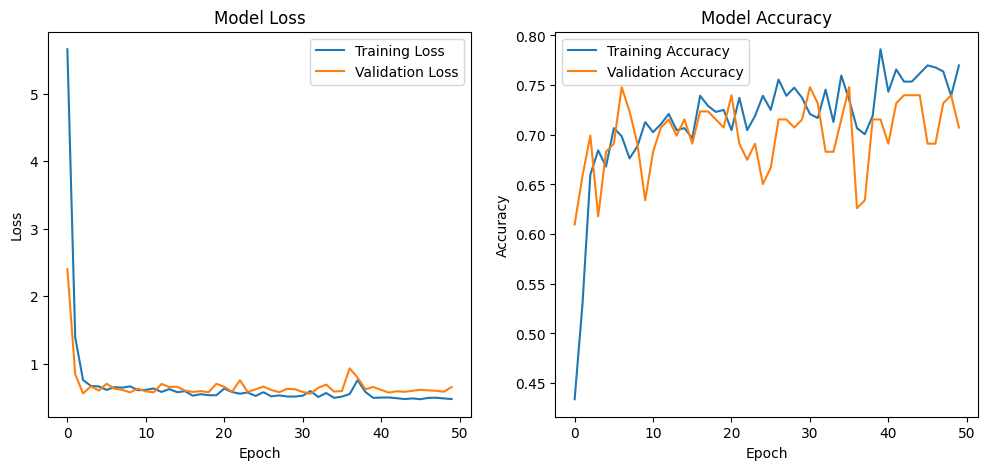

In [39]:
# 학습 과정에서의 손실 값과 어큐러시를 시각화합니다.
plt.figure(figsize=(12, 5))

# 손실 값 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# 어큐러시 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.show()

# epoch가 증가함에 따라 loss와 accuracy가 어떻게 변하는지 보고자 하는 것
